In [1]:
import numpy as np
import matplotlib.pyplot as pp
import seaborn
import zipfile
import collections

In [2]:
zipfile.ZipFile('weather.zip').extractall('.')

In [3]:
#TASK 1

In [4]:
ls weather

 Volume in drive C is OS
 Volume Serial Number is 1049-DBE3

 Directory of C:\Users\Rogelio\3753 Data Science\project2_weather\weather

06/28/2023  05:22 PM    <DIR>          .
06/29/2023  04:35 AM    <DIR>          ..
07/02/2023  04:38 AM            44,303 project2.ipynb
07/02/2023  04:38 AM            24,088 readme.txt
07/02/2023  04:38 AM         1,711,530 RSM00030710.dly
07/02/2023  04:38 AM         8,523,546 stations.txt
07/02/2023  04:38 AM         4,165,020 USW00014922.dly
07/02/2023  04:38 AM         3,692,790 USW00022536.dly
07/02/2023  04:38 AM         3,502,710 USW00023188.dly
07/02/2023  04:38 AM               576 weather.README
               8 File(s)     21,664,563 bytes
               2 Dir(s)  289,599,848,448 bytes free


In [5]:
%matplotlib inline

In [6]:
import urllib.request
#urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcnd-stations.txt', 'station.txt')

In [7]:
stations={}
for line in open('weather/stations.txt', 'r'):
    if 'GSN' in line:
        fields= line.split()
        
        stations[fields[0]]= ' '.join(fields[4:])

In [8]:
def findstation(s):
    found= {code: name for code, name in stations.items() if s in name}
    print(found)

In [9]:
def parsefile(filename):
    return np.genfromtxt(filename,
                         delimiter = dly_delimiter,
                         usecols = dly_usecols,
                         dtype = dly_dtype,
                         names = dly_names)

In [10]:
dly_delimiter = [11,4,2,4] + [5,1,1,1] * 31
dly_usecols = [1,2,3] + [4*i for i in range(1,32)]
dly_dtype = [np.int32,np.int32,(np.str_,4)] + [np.int32] * 31
dly_names = ['year','month','obs'] + [str(day) for day in range(1,31+1)]

In [11]:
minneapolis = parsefile('weather/USW00014922.dly')
sandiego = parsefile('weather/USW00023188.dly')

In [12]:
def unroll(record):
    startdate = np.datetime64('{}-{:02}'.format(record['year'],record['month']))
    dates = np.arange(startdate,startdate + np.timedelta64(1,'M'),np.timedelta64(1,'D'))
    
    rows = [(date,record[str(i+1)]/10) for i,date in enumerate(dates)]
    
    return np.array(rows,dtype=[('date','M8[D]'),('value','d')])

In [13]:
def getobs(filename,obs):
    data = np.concatenate([unroll(row) for row in parsefile(filename) if row[2] == obs])
    
    data['value'][data['value'] == -999.9] = np.nan
    
    return data

In [14]:
minneapolis_tmax = getobs('weather/USW00014922.dly','TMAX')
sandiego_tmin = getobs('weather/USW00023188.dly','TMIN')

In [15]:
def fillnans(data):
    dates_float = data['date'].astype(np.float64)
    
    nan = np.isnan(data['value'])
    
    data['value'][nan] = np.interp(dates_float[nan],dates_float[~nan],data['value'][~nan])

In [16]:
fillnans(minneapolis_tmax)
fillnans(sandiego_tmin)

In [17]:
def selectyear(data,year):
    start = np.datetime64('{}'.format(year))
    end = start + np.timedelta64(1,'Y')
    
    return data[(data['date'] >= start) & (data['date'] < end)]['value']

In [18]:
minneapolis_tmax_all= np.vstack([selectyear(minneapolis_tmax, year)[:365] for year in range (1940,2014+1)])
sandiego_tmin_all= np.vstack([selectyear(sandiego_tmin, year)[:365] for year in range (1940,2014+1)])

In [19]:
#TASK 2 (a)

In [20]:
minneapolis_mean=np.mean(minneapolis_tmax_all, axis=1)
minneapolis_mean

array([11.83917808, 13.82547945, 12.75561644, 11.87452055, 13.12520548,
       11.6430137 , 13.43260274, 12.54328767, 13.36410959, 13.54219178,
       10.8569863 , 10.44876712, 12.80109589, 13.64356164, 12.78493151,
       12.96191781, 12.65589041, 12.49863014, 13.10438356, 12.94986301,
       12.18849315, 12.48767123, 11.22136986, 12.85616438, 13.30027397,
       11.0890411 , 11.89205479, 11.47780822, 12.64821918, 12.27178082,
       12.07945205, 12.01835616, 10.28465753, 13.11643836, 12.26849315,
       12.26465753, 13.88438356, 12.65945205, 12.21123288, 11.47726027,
       12.87780822, 13.33589041, 12.05726027, 12.1709589 , 12.2860274 ,
       11.75835616, 12.51917808, 15.14986301, 13.84164384, 12.12493151,
       14.04356164, 12.83013699, 12.28273973, 11.29589041, 12.78767123,
       12.55753425, 11.15534247, 12.08328767, 14.54383562, 14.02438356,
       12.90739726, 13.54109589, 12.88109589, 12.93671233, 12.8539726 ,
       13.77972603, 14.43068493, 13.70465753, 12.10739726, 12.33

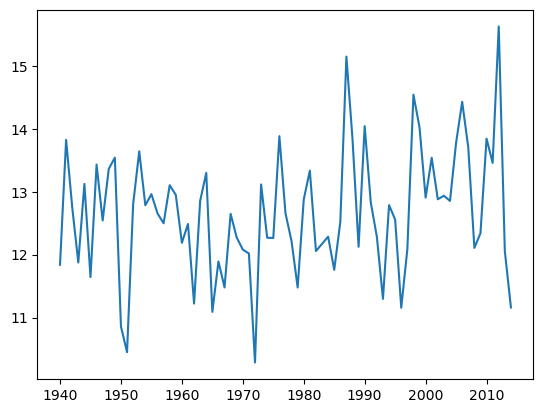

In [21]:
year=np.arange(75)
year=year+1940
pp.plot(year,minneapolis_mean)

In [23]:
#TASK 2(b)
minneapolis_mean

array([11.83917808, 13.82547945, 12.75561644, 11.87452055, 13.12520548,
       11.6430137 , 13.43260274, 12.54328767, 13.36410959, 13.54219178,
       10.8569863 , 10.44876712, 12.80109589, 13.64356164, 12.78493151,
       12.96191781, 12.65589041, 12.49863014, 13.10438356, 12.94986301,
       12.18849315, 12.48767123, 11.22136986, 12.85616438, 13.30027397,
       11.0890411 , 11.89205479, 11.47780822, 12.64821918, 12.27178082,
       12.07945205, 12.01835616, 10.28465753, 13.11643836, 12.26849315,
       12.26465753, 13.88438356, 12.65945205, 12.21123288, 11.47726027,
       12.87780822, 13.33589041, 12.05726027, 12.1709589 , 12.2860274 ,
       11.75835616, 12.51917808, 15.14986301, 13.84164384, 12.12493151,
       14.04356164, 12.83013699, 12.28273973, 11.29589041, 12.78767123,
       12.55753425, 11.15534247, 12.08328767, 14.54383562, 14.02438356,
       12.90739726, 13.54109589, 12.88109589, 12.93671233, 12.8539726 ,
       13.77972603, 14.43068493, 13.70465753, 12.10739726, 12.33

In [ ]:
minneapolis_warmest=np.argmax(minneapolis_mean)+1940
minneapolis_warmest

In [ ]:
#TASK 2(c)

In [ ]:
pp.figure(figsize=(12,4))
days=np.arange(366)
pp.plot(days,selectyear(minneapolis_tmax,minneapolis_warmest))

In [ ]:
#TASK 3(a)

In [ ]:
sandiego_mean=np.mean(sandiego_tmin_all, axis=1)
sandiego_mean

In [ ]:
year=np.arange(75)
year=year+1940
pp.plot(year,sandiego_mean)

In [ ]:
#TASK 3(b)

In [ ]:
sandiego_coldest=np.argmin(sandiego_mean)+1940
sandiego_coldest

In [ ]:
#TASK 3(c)

In [ ]:
pp.figure(figsize=(12,4))
days=np.arange(366)
pp.plot(days,selectyear(sandiego_tmin,sandiego_coldest))

In [ ]:
pp.figure(figsize=(12,4))
days= np.arange(1,365+1)
pp.fill_between(days,np.min(minneapolis_tmax_all, axis=0), np.max(minneapolis_tmax_all, axis=0), alpha=0.4)
pp.plot(selectyear(minneapolis_tmax, minneapolis_warmest), label='Minneapolis_tmax')

pp.fill_between(days,np.min(sandiego_tmin_all, axis=0), np.max(sandiego_tmin_all, axis=0), alpha=0.4)
pp.plot(selectyear(sandiego_tmin, sandiego_coldest), label='SanDiego_tmin')

pp.axis(xmax=365)
pp.legend(loc='best')